<a href="https://colab.research.google.com/github/Sha-98/Data-Science-Masters/blob/main/Web_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scrapper Application**

## **Unlocking the Power of Data: Building an Image Scraper Web App with Flask, MongoDB, and Azure**

Web development is always changing, and making projects that make it easier to get and handle data is super important. This article talks about making an Image Scraper Web App. It's like a tool that helps people easily get and save pictures from Google. We use MongoDB to keep the data safe and Microsoft Azure to put our tool online smoothly.

In today's digital world, pictures are a big deal. Whether you're a coder trying to get better or just really into tech and pictures, this project shows you how to make a smart and easy Image Scraper. We'll look at the details of using Flask and MongoDB and how Azure helps us make our app work well and be available to lots of people online.

Get ready as we break down the code, check out how web scraping works, and see the cool part of putting our creation on the internet. It's more than just a project—it's a way to use the power of data, one picture at a time.

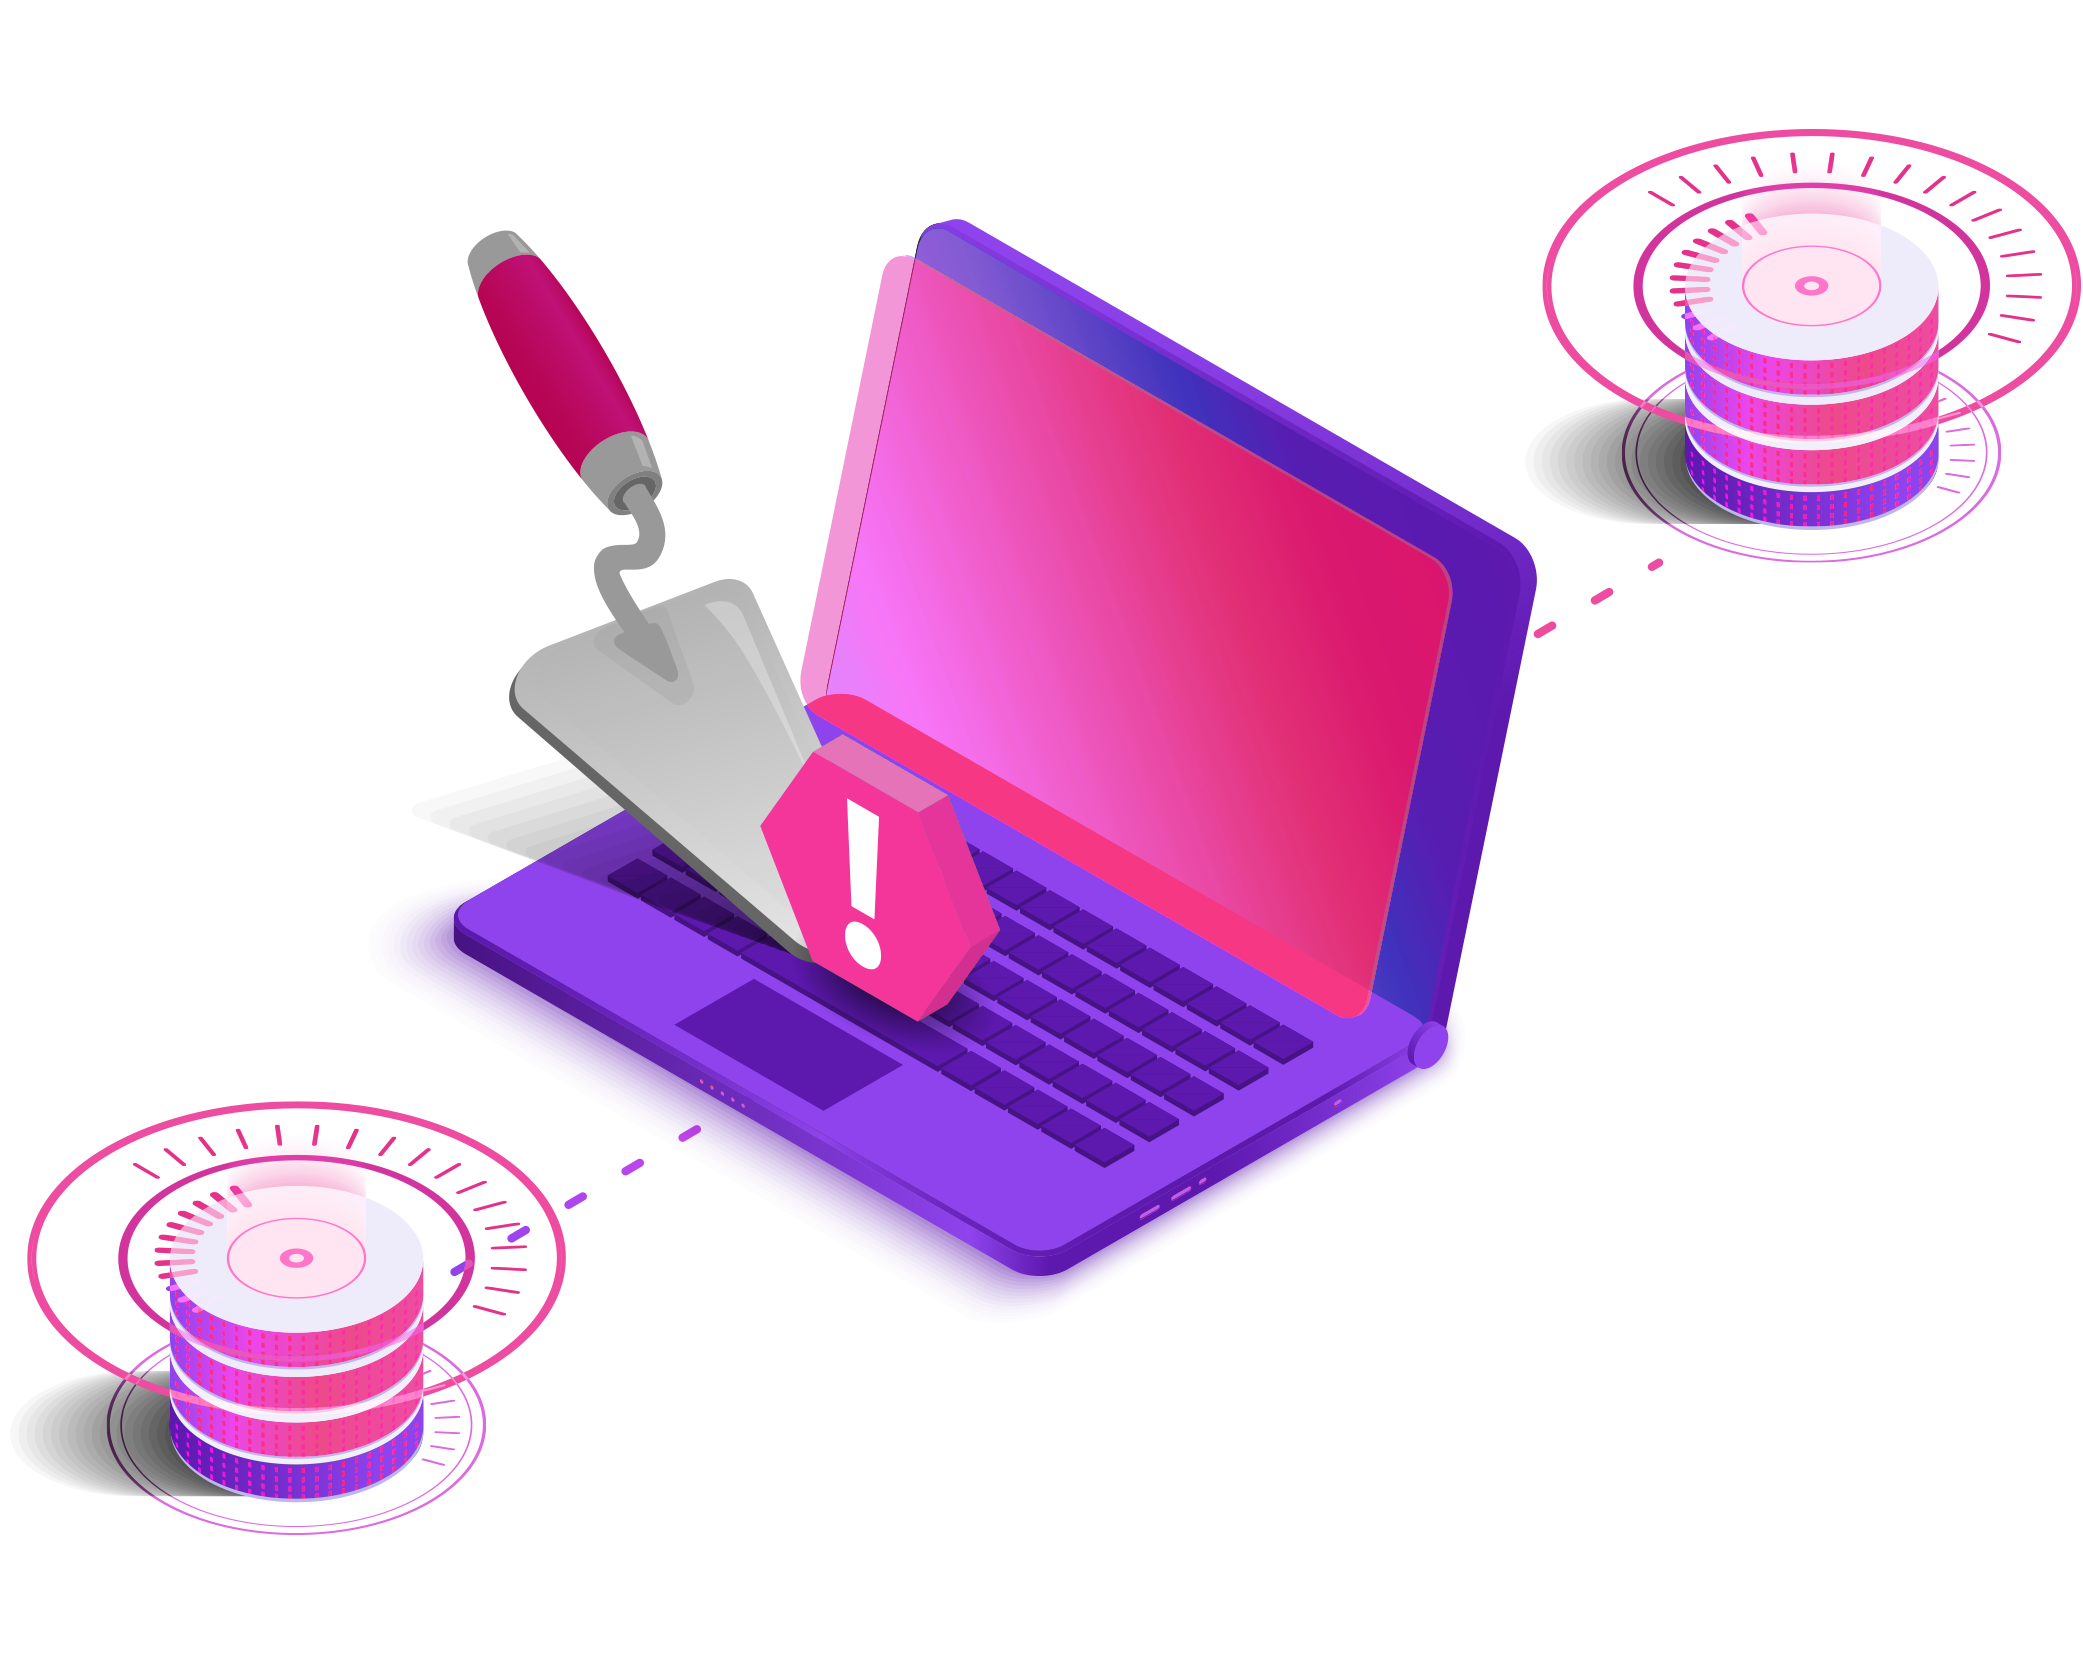

The very first step is to download a text editor, I am using Visual Studio Code by Microsoft, usually called VS Code. You may use anyone of your choice.

Now, we will first define our problem statement.





**Problem Statement -**

*Develop a user-friendly web application that empowers users to effortlessly search, scrape, and store images from Google, ensuring a seamless and intuitive experience for acquiring visual content? The goal is to provide a tool that simplifies the process of acquiring images while adhering to legal and ethical considerations, handling dynamic content, and utilizing technologies like Flask, MongoDB, and Microsoft Azure for efficient deployment, scalability, and accessibility.*

### **Step 0**

Import all the necessary libraries for our project. These are:
 1. Flask
 2. requests
 3. BeautifulSoup
 4. urllib and urlopen
 5. logging
 6. pymongo

The code to import these is as follows.

**NOTE - Please make sure to install these libraries to import them into your python file.**

In [ ]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import logging
import pymongo

Let's break down the purpose of each imported library in the context of your web scraping project:

**1. Flask and render_template:**
Flask: Flask is a web framework for Python. It allows you to build web applications quickly and with minimal code. In your project, Flask is used to create the web application, handle routing, and serve HTML templates.

**2. render_template:** This function from Flask is used to render HTML templates, which is crucial for displaying the scraped images in a user-friendly manner on the web page.

**3. CORS (Cross-Origin Resource Sharing):** CORS is a security feature implemented by web browsers to control which web pages are allowed to access resources on a given domain. In your project, it allows your Flask application to be accessed by a web page that is hosted on a different domain.

**4. requests:**
The requests library is used for making HTTP requests. In your project, it is likely used to send a request to the Google search page to retrieve the HTML content that will later be scraped for image URLs.

**5. BeautifulSoup as bs:**
BeautifulSoup is a powerful library for parsing HTML and XML documents. In your project, it is used to extract image URLs from the HTML content retrieved from the Google search page.

**6. urlopen from urllib.request:**
urlopen is used to open URLs. In your project, it is used in conjunction with BeautifulSoup to open the Google search URL and fetch the HTML content.

**7. logging:**
The logging module provides flexible logging of messages during program execution. In a web scraping project, logging can be used to record information, warnings, and errors during the scraping process, aiding in debugging and monitoring.

**8. pymongo:**
PyMongo is the Python driver for MongoDB, a NoSQL database. In your project, it is likely used to store the scraped image URLs in a MongoDB database for future retrieval or analysis.

***These libraries collectively enable us to build a web application, fetch and parse HTML content, make HTTP requests, handle cross-origin resource sharing, and interact with a MongoDB database for storing and managing scraped data. Each library serves a specific purpose, contributing to the overall functionality of your web scraping project.***

### **Step 1**
The first step to actually scrape anything online is to first get to the target url. Now, in our project, we want this step to be dynamic as user should be able to choose what image to scrape. For this we will be fetching the final url in a dynamic way using the user input and the base url. As we are scraping the pictures from google, the base url will be the google url, which will be merged with the word or group of words entered by the user.

The code for this is as follows"


In [ ]:
searchString = request.form['content'].replace(" ","")
flipkart_url = "https://www.flipkart.com/search?q=" + searchString